In [12]:
import pandas as pd

df = pd.read_csv("osm.csv")
df["bin"] = [1 if x <= 2.5 else 0 for x in df["activity"]]

eos24ur = pd.read_csv("osm_eos24ur.csv")
eos3ae6 = pd.read_csv("osm_eos3ae6.csv")

In [13]:
eos24ur = eos24ur.iloc[:, 2:]
eos3ae6 = eos3ae6.iloc[:, 2:]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

def create_train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Create a balanced train-test split.
    
    Parameters:
    X (DataFrame): Features dataframe.
    y (DataFrame or Series): Endpoints dataframe or series (target values).
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Random seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test: Split datasets.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    return X_train, X_test, y_train, y_test


def train_and_validate_rf(X_train, y_train, X_test, y_test):
    """
    Train a Random Forest classifier and validate its performance using AUROC.
    
    Parameters:
    X_train (DataFrame): Training features.
    y_train (DataFrame or Series): Training labels.
    X_test (DataFrame): Testing features.
    y_test (DataFrame or Series): Testing labels.

    Returns:
    model (RandomForestClassifier): Trained Random Forest model.
    y_pred (array): Predictions on the test set.
    """
    # Initialize the Random Forest classifier
    model = RandomForestClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Validate the performance
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUROC: {auroc:.2f}")
    print("Classification Report:")
    print(report)

    return model, y_pred


In [15]:
X_train, X_test, y_train, y_test = create_train_test_split(eos24ur, df["bin"])
model, y_pred = train_and_validate_rf(X_train, y_train, X_test, y_test)

Accuracy: 0.69
AUROC: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        48
           1       0.66      0.54      0.59        35

    accuracy                           0.69        83
   macro avg       0.68      0.67      0.67        83
weighted avg       0.68      0.69      0.68        83



In [16]:
X_train, X_test, y_train, y_test = create_train_test_split(eos3ae6, df["bin"])
model, y_pred = train_and_validate_rf(X_train, y_train, X_test, y_test)

Accuracy: 0.67
AUROC: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        48
           1       0.64      0.51      0.57        35

    accuracy                           0.67        83
   macro avg       0.67      0.65      0.65        83
weighted avg       0.67      0.67      0.67        83



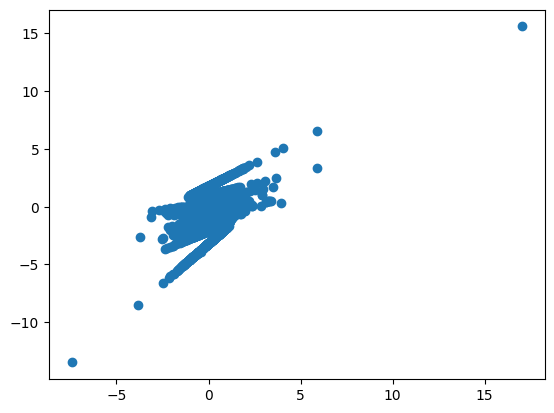

In [17]:
import matplotlib.pyplot as plt

plt.scatter(eos24ur, eos3ae6)

In [21]:
eos4wt0 = pd.read_csv("osm_eos4wt0.csv")
eos4wt0 = eos4wt0.iloc[:, 2:]
X_train, X_test, y_train, y_test = create_train_test_split(eos4wt0, df["bin"])
model, y_pred = train_and_validate_rf(X_train, y_train, X_test, y_test)

Accuracy: 0.77
AUROC: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        48
           1       0.67      0.89      0.77        35

    accuracy                           0.77        83
   macro avg       0.78      0.79      0.77        83
weighted avg       0.80      0.77      0.77        83

